In [1]:
import tensorflow as tf
import keras

import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from extracao_dados import get_images_array

1536 images loaded


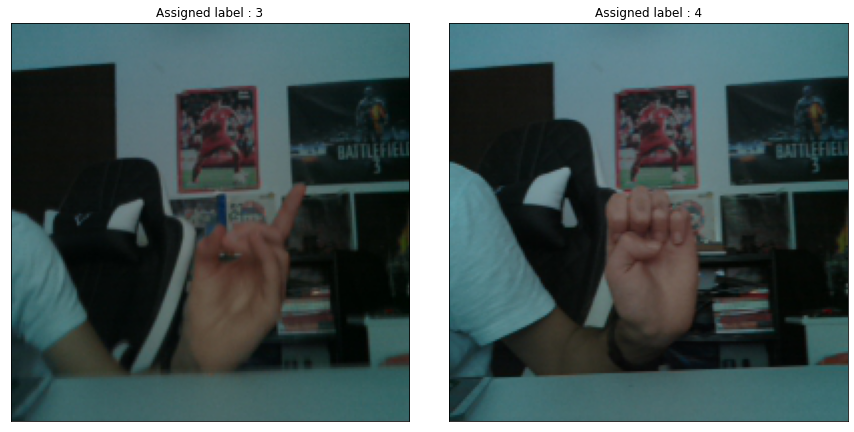

In [2]:
images, labels = get_images_array()

images = images.astype(np.float32)

le = preprocessing.LabelEncoder()
le.fit(labels)
labels = le.transform(labels)

labels = np.array(labels).astype(np.int32)

def display_rand_images(images, labels):
    plt.figure(1 , figsize = (15 , 10))
    n = 0 
    for i in range(2):
        n += 1 
        r = np.random.randint(0 , images.shape[0] , 1)
        
        plt.subplot(1, 2, n)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.1)
        plt.imshow(images[r[0]])
        
        plt.title('Assigned label : {}'.format(labels[r[0]]))
        plt.xticks([])
        plt.yticks([])
        
    plt.show()

display_rand_images(images, labels)

In [3]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state=666)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size = 0.5, random_state=666)

print(len(x_train), 'images for training')
print(len(x_test), 'images for test')
print(len(x_val), 'images for validation')

1228 images for training
154 images for test
154 images for validation


In [4]:
y_train = np.array(y_train)

In [18]:
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

model = keras.models.Sequential([
    Conv2D(64, 3, activation='relu', padding='same', input_shape=[200, 200, 3]),
    MaxPooling2D(2),
    Conv2D(128, 3, activation='relu', padding='same'),
    Conv2D(128, 3, activation='relu', padding='same'),
    MaxPooling2D(2),
    Flatten(),
    Dense(128, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(len(set(labels)), activation='softmax')
])

In [21]:
from keras.optimizers import SGD, RMSprop

optimizer = RMSprop(lr = 0.001)
model.compile(loss = 'sparse_categorical_crossentropy', optimizer=optimizer, metrics = ['accuracy'])

In [23]:
model.fit(x_train, y_train, 
          epochs=5, 
          batch_size = 8,
          steps_per_epoch=len(x_train)/8,
          validation_data=(x_val, y_val),
          validation_steps = len(x_val)/8,
          verbose=1)

Epoch 1/5
154/153 [==============================] - 11s 71ms/step - loss: 0.1471 - accuracy: 0.9943 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 2/5
154/153 [==============================] - 11s 69ms/step - loss: 8.3296e-06 - accuracy: 1.0000 - val_loss: 4.7105e-05 - val_accuracy: 1.0000
Epoch 3/5
154/153 [==============================] - 11s 69ms/step - loss: 3.6889e-09 - accuracy: 1.0000 - val_loss: 0.0401 - val_accuracy: 0.9935
Epoch 4/5
154/153 [==============================] - 11s 69ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 7.6433e-05 - val_accuracy: 1.0000
Epoch 5/5
154/153 [==============================] - 11s 69ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 4.8702e-05 - val_accuracy: 1.0000


In [24]:
loss, accuracy = model.evaluate(x_test, y_test)

print("Loss = ",loss,"\nAccuracy = ",accuracy)

5/5 [==============================] - 1s 112ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Loss =  0.0 
Accuracy =  1.0
